# Project Title :Customer Churn Analytics:

# Abstract
In the competitive landscape of telecommunications, customer churn poses a significant challenge, impacting revenue and market share. This project aims to analyze customer churn patterns within a telecom company to understand the underlying factors contributing to customer attrition. The study leverages historical customer data, including demographic information, service usage metrics, and customer interaction logs. Through exploratory data analysis and predictive modeling techniques, key drivers of churn will be identified, such as service dissatisfaction, pricing strategies, contract terms, and customer support effectiveness.

# Problem Statement
 The objective of this project is to analyze customer churn in a telecom company. Customer churn refers to the phenomenon where customers switch from one service provider to another or cancel their subscription altogether. By analyzing customer chum patterns, we aim to identify the factors that contribute to churn and develop strategies to mitigate it.

## About Data
Data is divided into 3 Types

## Demographic information
• gender: Whether the customer is a male or a female.

• SeniorCitizen: Whether the customer is a senior citizen or not (1, 0).

• Partner: Whether the customer has a partner or not (Yes, No)

• Dependents : Whether the customer has dependents or not (Yes, No)

## Customer Accounting Information

• Contract: The contract term of the customer (Month-to-month, One year, Two year)

• PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

• MonthlyCharges: The amount charged to the customer monthly

• TotalCharges: The total amount charged to the customer

• tenure: Number of months the customer has stayed with the company

• PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer (au card (automatic))

• customeriD: Customer ID

## Service Information

PhoneService: Whether the customer has a phone service or not (yes, No)

• MultipleLines: Whether the customer has multiple lines or not (yes, No, No phone service)

• InternetService: Customer's internet service provider (DSL, Fiber optic, No)

• OnlineSecurity: Whether the customer has online security or not (yes, No, No internet service)

• OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

• DeviceProtection: Whether the customer has device protection or not (yes, No, No internet service)

• TechSupport: Whether the customer has tech support or not (yes, No, No internet service)

• Streaming TV: Whether the customer has streaming TV or not (Yes, No, No internet service)

•StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

## Target Variable
Churn: whether the customer churn or not(yes/no)

## 1. Data Preparation

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [8]:
for col in df.columns:
  print(f"columns: {col}-Unique Values: {df[col].unique()}")

columns: customerID-Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
columns: gender-Unique Values: ['Female' 'Male']
columns: SeniorCitizen-Unique Values: [0 1]
columns: Partner-Unique Values: ['Yes' 'No']
columns: Dependents-Unique Values: ['No' 'Yes']
columns: tenure-Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
columns: PhoneService-Unique Values: ['No' 'Yes']
columns: MultipleLines-Unique Values: ['No phone service' 'No' 'Yes']
columns: InternetService-Unique Values: ['DSL' 'Fiber optic' 'No']
columns: OnlineSecurity-Unique Values: ['No' 'Yes' 'No internet service']
columns: OnlineBackup-Unique Values: ['Yes' 'No' 'No internet service']
columns: DeviceProtection-Unique Values: ['No' 'Yes' 'No internet service']
columns: TechSupport-Unique Va

In [11]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [12]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


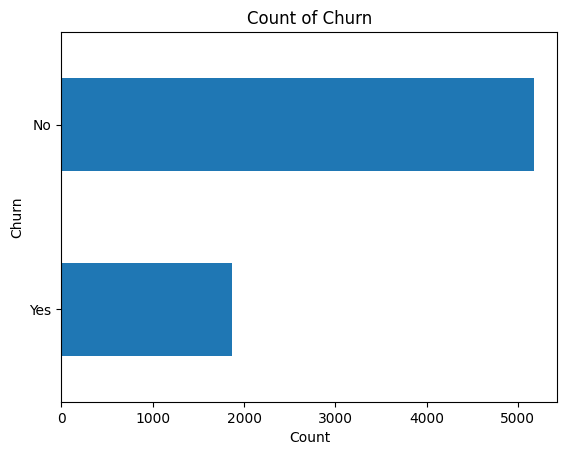

In [13]:
df['Churn'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("Churn")
plt.title("Count of Churn")
plt.gca().invert_yaxis()
plt.show()

In [16]:
df['Churn'].value_counts()/len(df)

,count
Churn,
No,0.73463
Yes,0.26537


In [17]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [18]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df_copy = df.copy()

In [20]:
df_copy.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [21]:
df_copy.loc[df_copy['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [22]:
df_copy.isna().sum()/len(df_copy)

,0
customerID,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


In [23]:
df_copy.dropna(how='any',inplace=True)

In [24]:
# Get the max tenure
print(df_copy['tenure'].max())

72


In [25]:
# Define the bins and labels
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

# Create the tenure_group column
df_copy['tenure_group'] = pd.cut(df_copy['tenure'], bins=bins, labels=labels, right=False)


In [27]:
 df_copy['tenure_group'].value_counts()


,count
tenure_group,
1 - 12,2058
61 - 72,1121
13 - 24,1047
25 - 36,876
49 - 60,820
37 - 48,748


In [28]:
 df_copy['tenure_group'].value_counts()/len(df_copy)

,count
tenure_group,
1 - 12,0.292662
61 - 72,0.159414
13 - 24,0.148891
25 - 36,0.124573
49 - 60,0.116610
37 - 48,0.106371


In [29]:
#drop column customerID and tenure
df_copy.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## 2. Data Exploration

**Univariate Analysis**

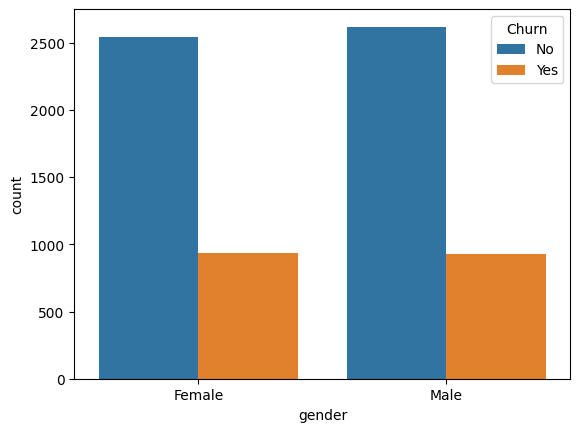

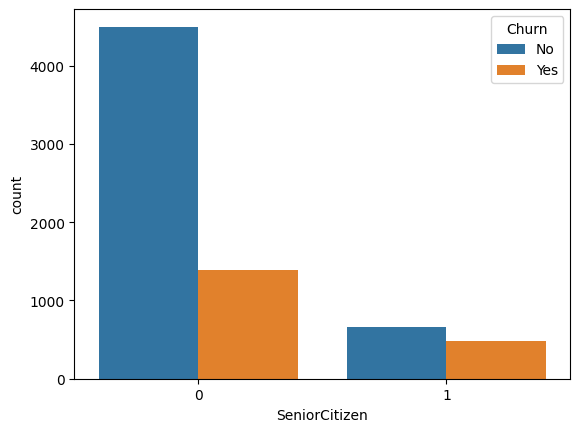

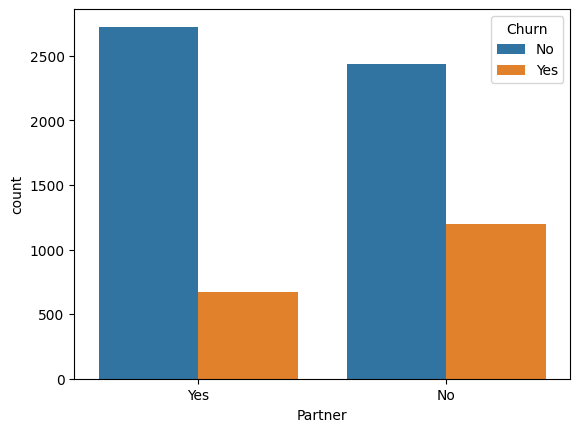

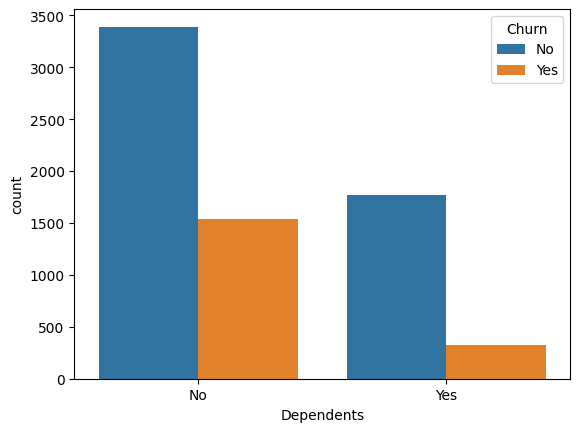

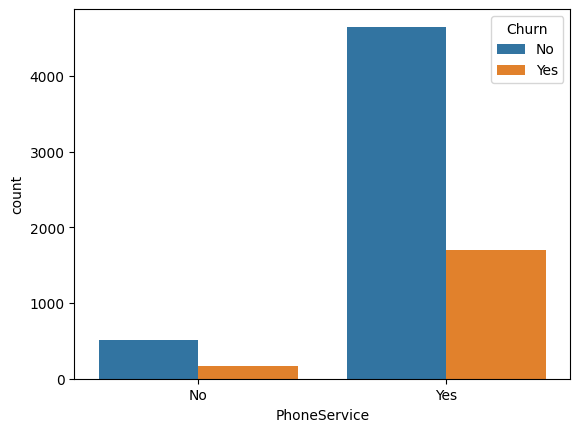

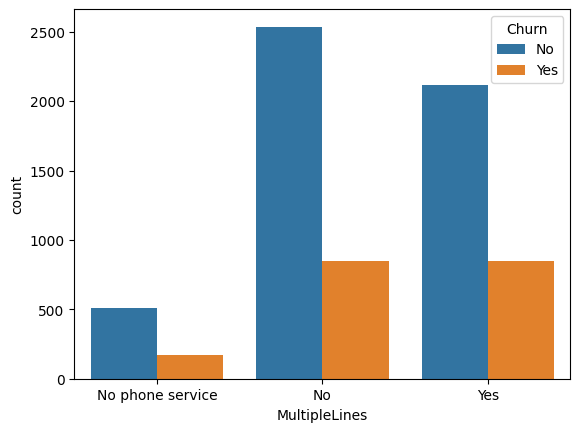

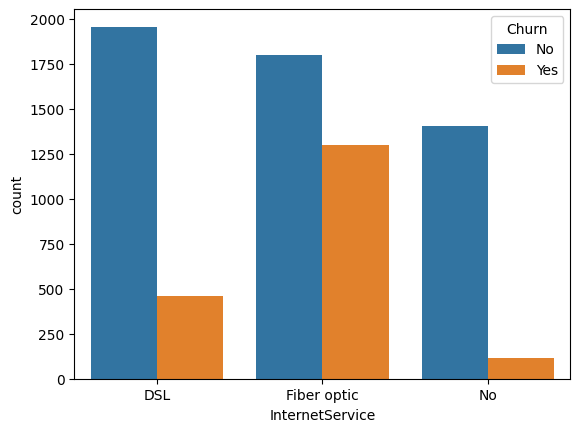

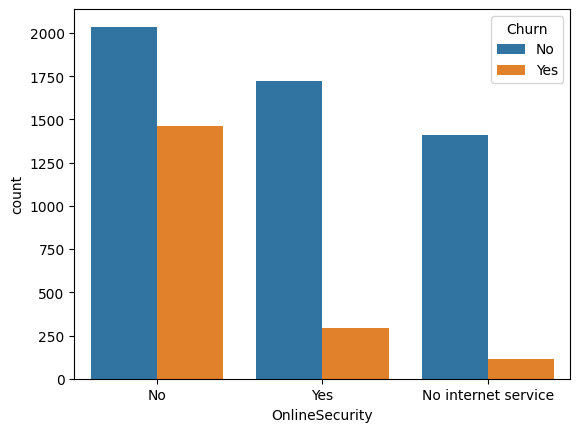

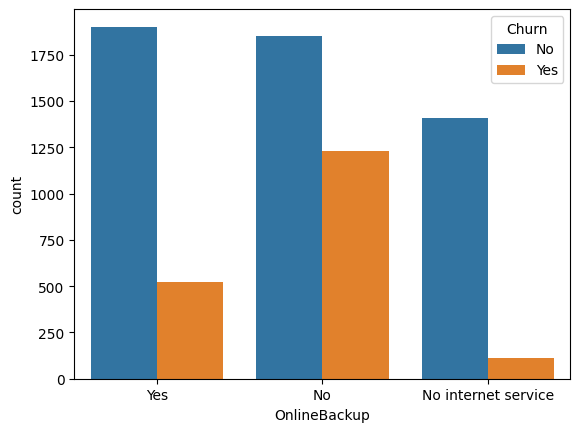

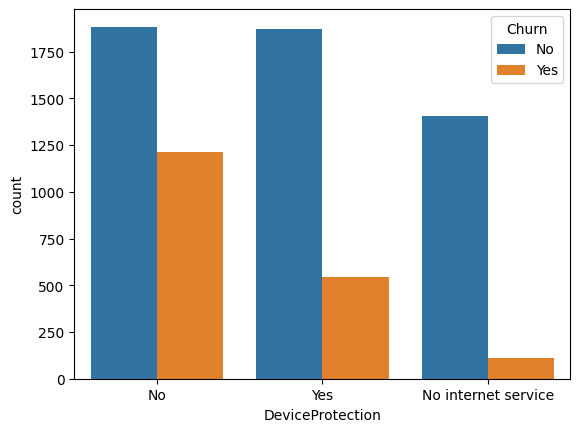

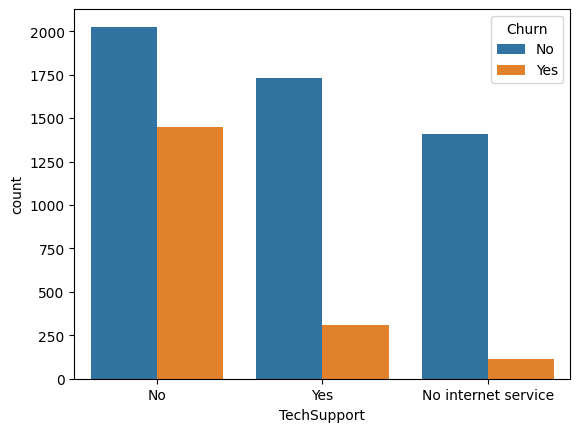

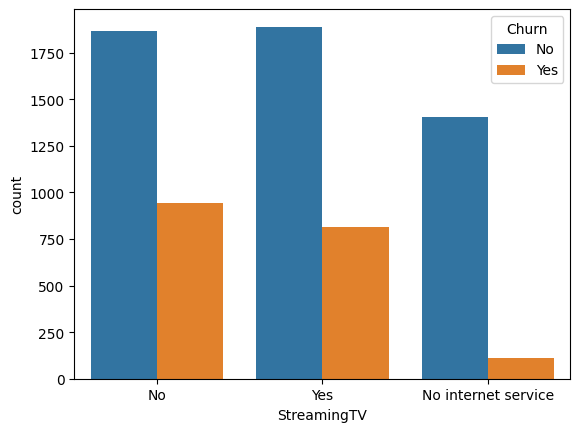

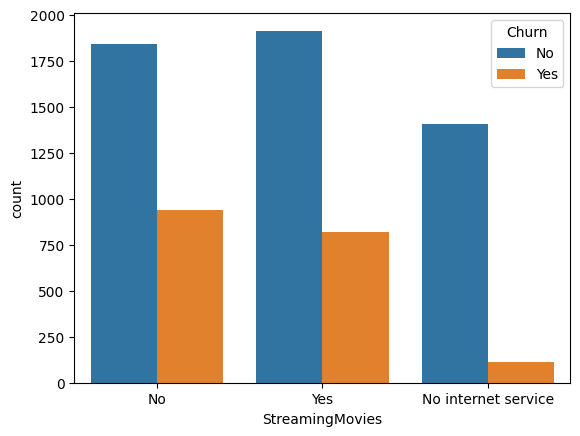

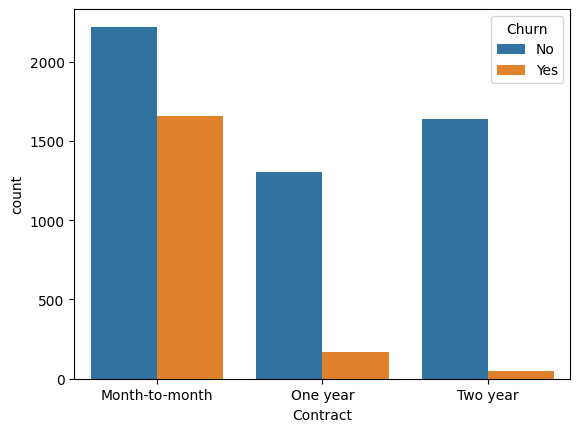

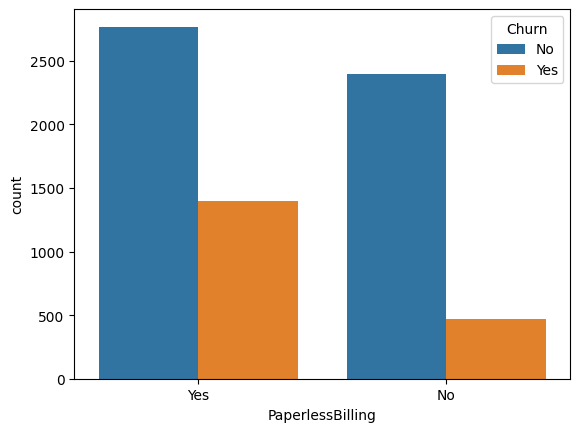

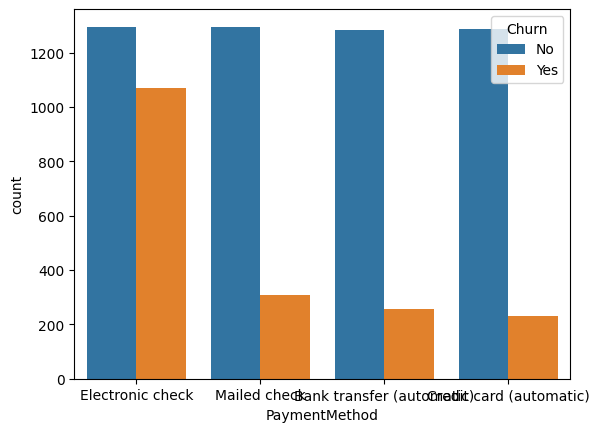

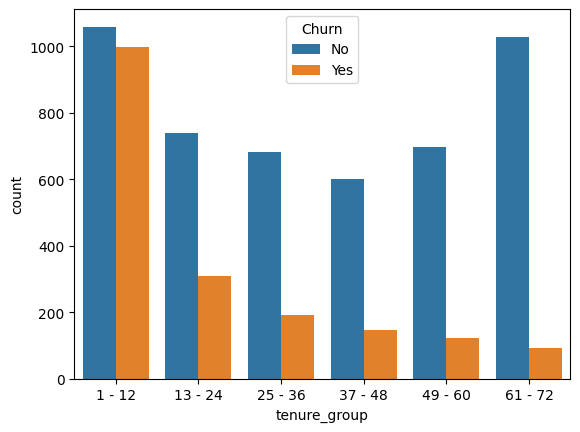

In [31]:
for i, predictor in enumerate(df_copy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df_copy, x=predictor, hue='Churn')

In [32]:
df_copy['Churn'] = np.where(df_copy.Churn == 'Yes',1,0)

In [33]:
df_copy.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
6002,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,82.85,460.25,1,1 - 12
6847,Female,0,Yes,Yes,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Mailed check,55.95,1082.80,0,13 - 24
3986,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,96.60,6424.25,0,61 - 72


In [34]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

le

LabelEncoder()

In [35]:
categ=['gender','SeniorCitizen', 'tenure_group' ,'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',  'Churn',]

df_copy[categ] = df_copy[categ].apply(le.fit_transform)

In [36]:
df_copy.sample(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2172,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,43.95,43.95,0,0
6974,0,0,1,0,1,2,1,0,0,2,0,2,2,1,1,2,98.85,4947.55,0,4
6654,0,0,1,0,1,2,1,0,0,0,0,2,0,0,1,2,86.50,582.50,1,0


<Axes: >

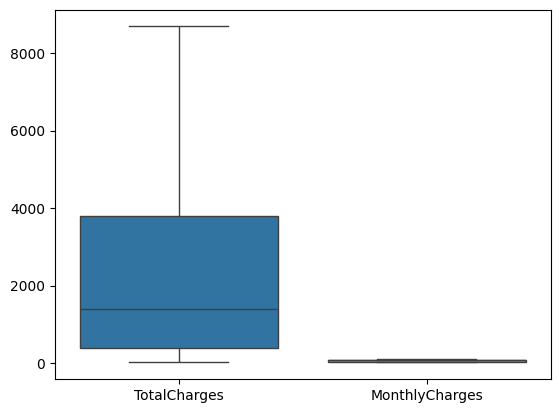

In [37]:
sns.boxplot(data=df_copy[['TotalCharges', 'MonthlyCharges']])

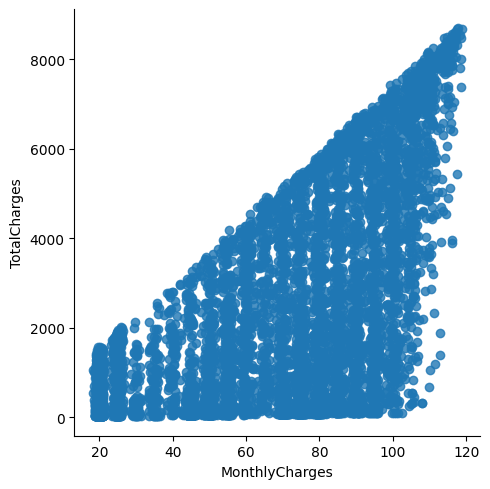

In [38]:
sns.lmplot(data=df_copy, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

<ipython-input-40-45767c3b2df9>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_copy.MonthlyCharges[(df_copy["Churn"] == 0) ],
<ipython-input-40-45767c3b2df9>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_copy.MonthlyCharges[(df_copy["Churn"] == 1) ],


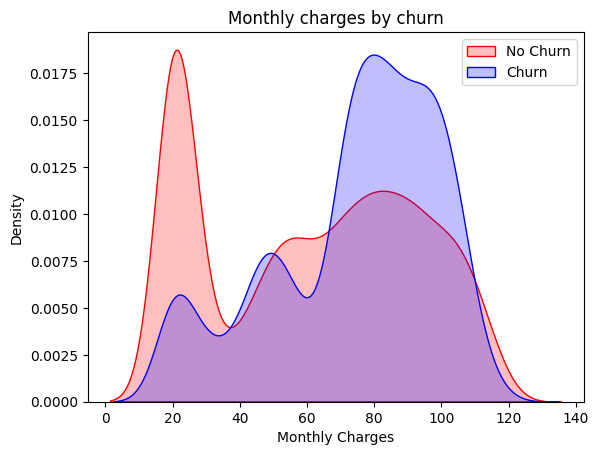

In [40]:
# kernel density estimate (KDE) plot.
Mth = sns.kdeplot(df_copy.MonthlyCharges[(df_copy["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_copy.MonthlyCharges[(df_copy["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')
plt.show()

## Insight: Churn is high when Monthly Charges are high

<ipython-input-41-fc862091e469>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_copy.TotalCharges[(df_copy["Churn"] == 0) ],
<ipython-input-41-fc862091e469>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_copy.TotalCharges[(df_copy["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

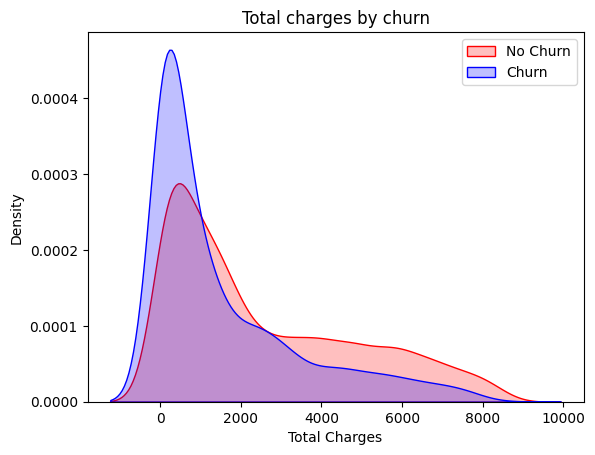

In [41]:
Tot = sns.kdeplot(df_copy.TotalCharges[(df_copy["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df_copy.TotalCharges[(df_copy["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

<Axes: >

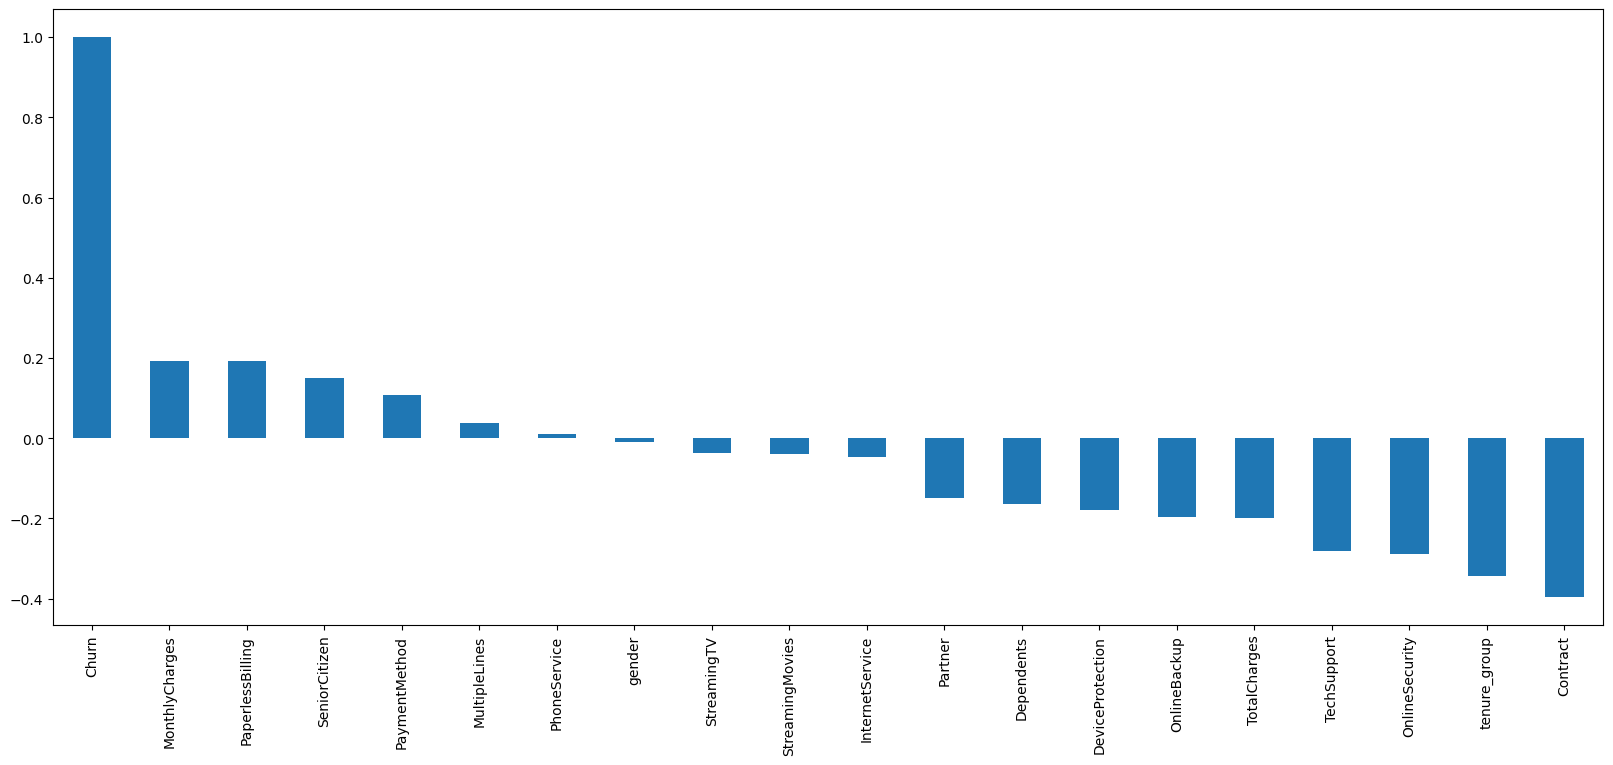

In [42]:
plt.figure(figsize=(20,8))
df_copy.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight:**

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

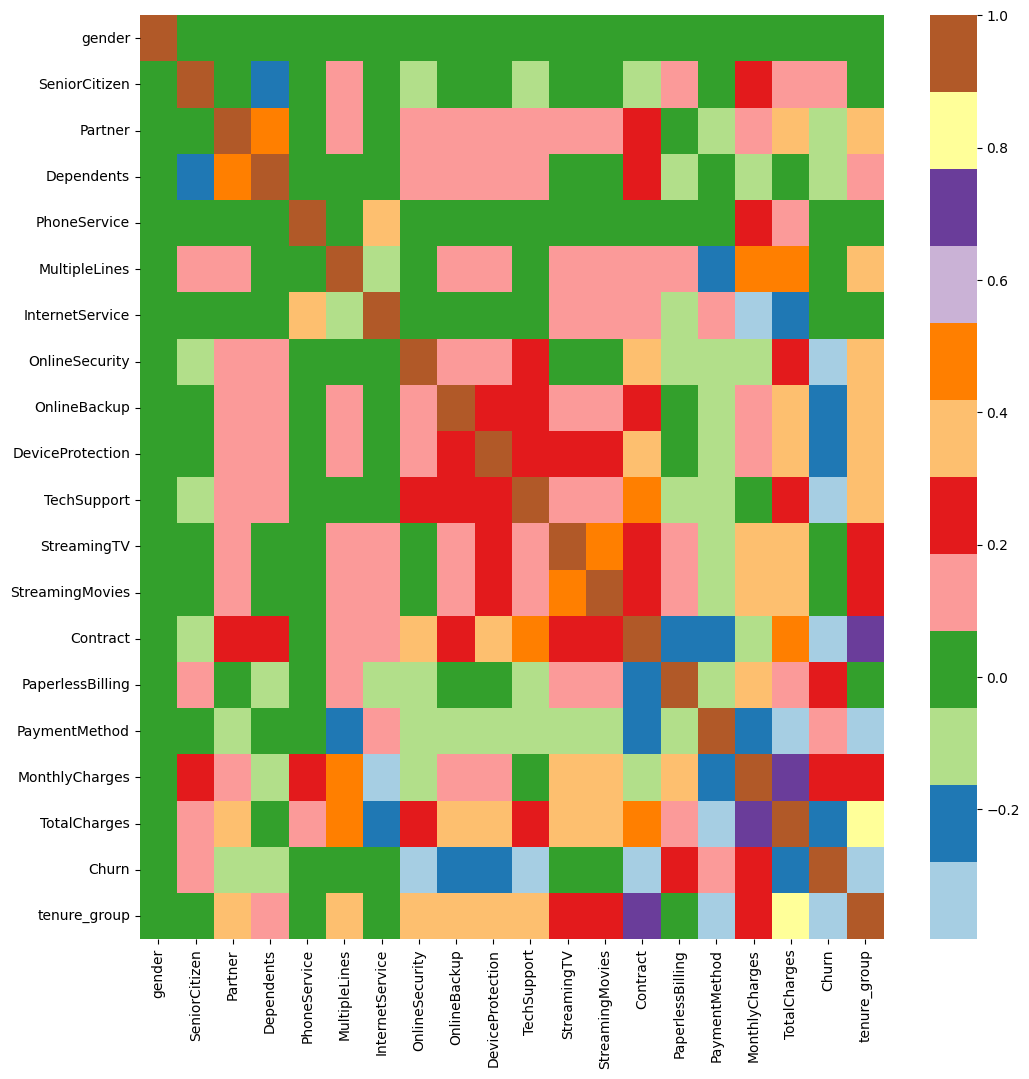

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(df_copy.corr(), cmap="Paired")
plt.show()

### Bivariate Analysis

In [44]:
new_df1_target0=df_copy.loc[df_copy["Churn"]==0]
new_df1_target1=df_copy.loc[df_copy["Churn"]==1]

In [45]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

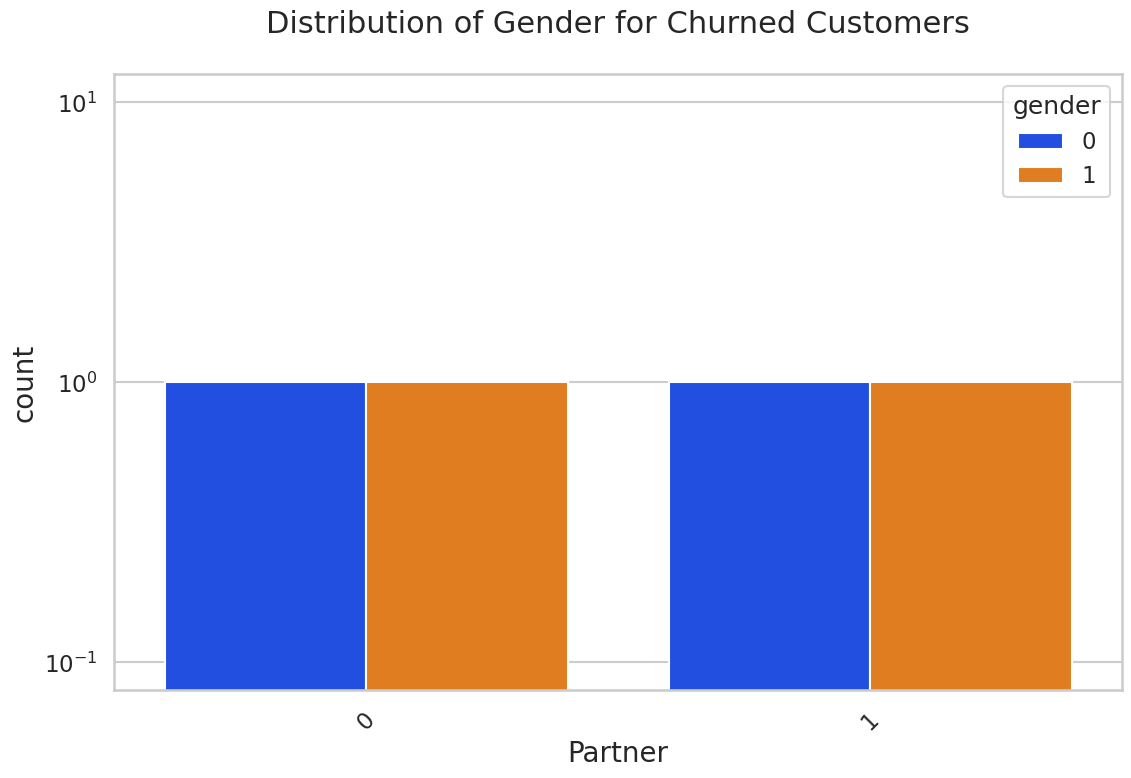

In [46]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

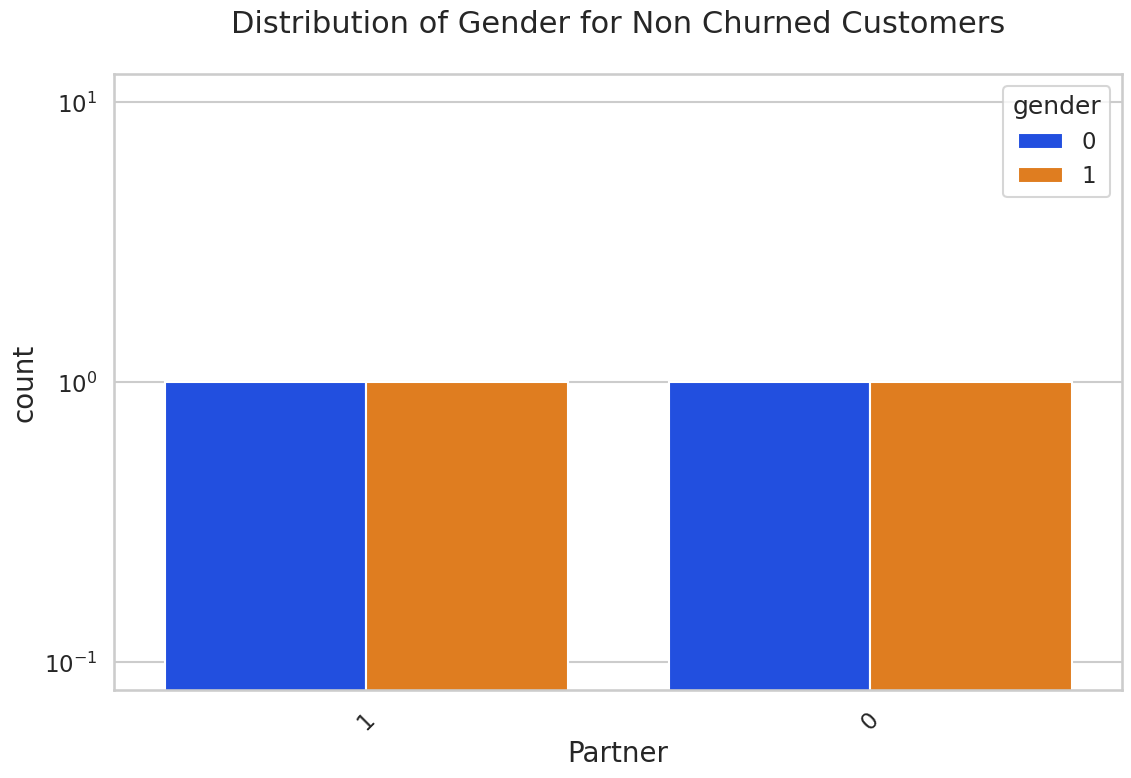

In [47]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

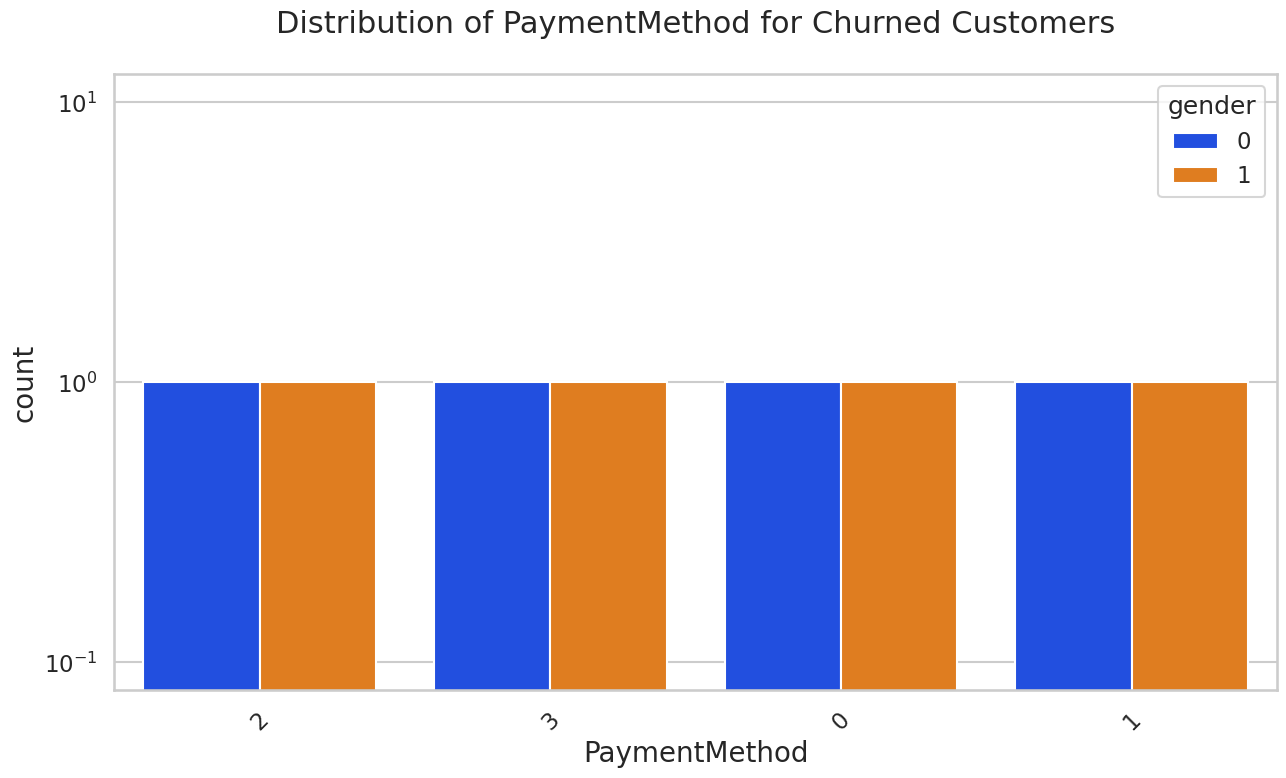

In [48]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

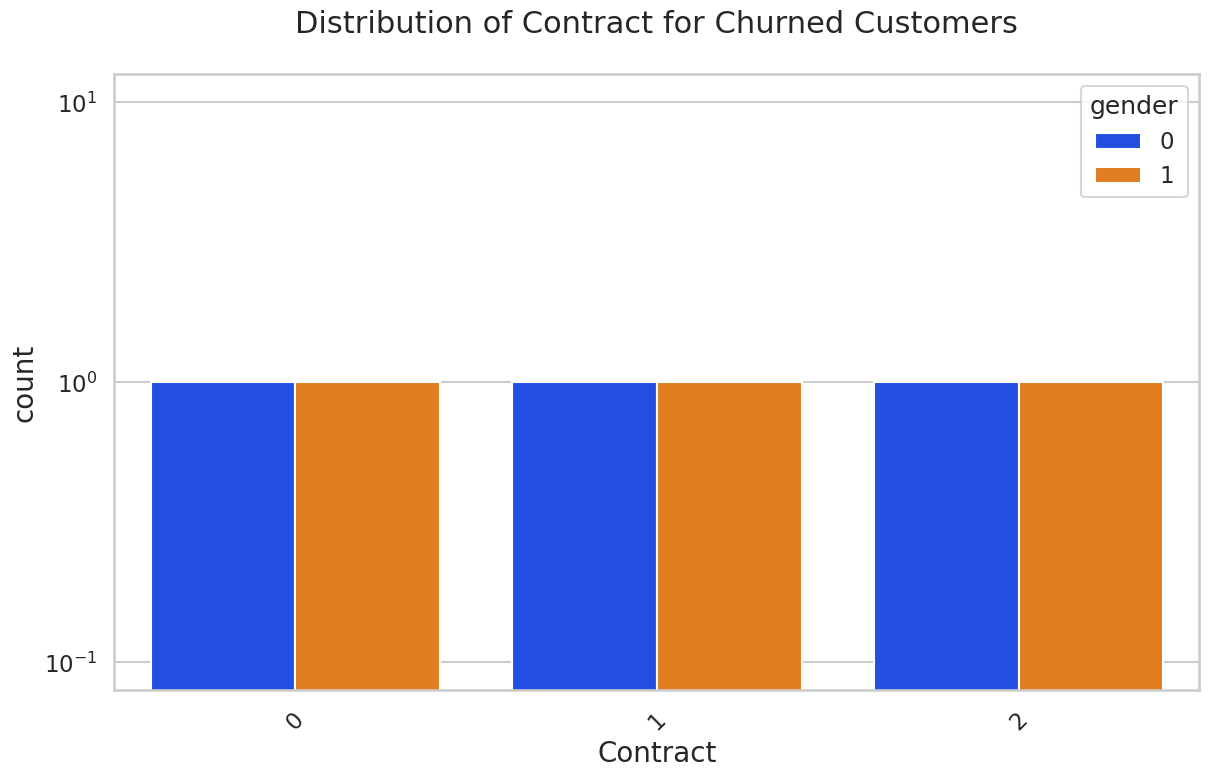

In [49]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

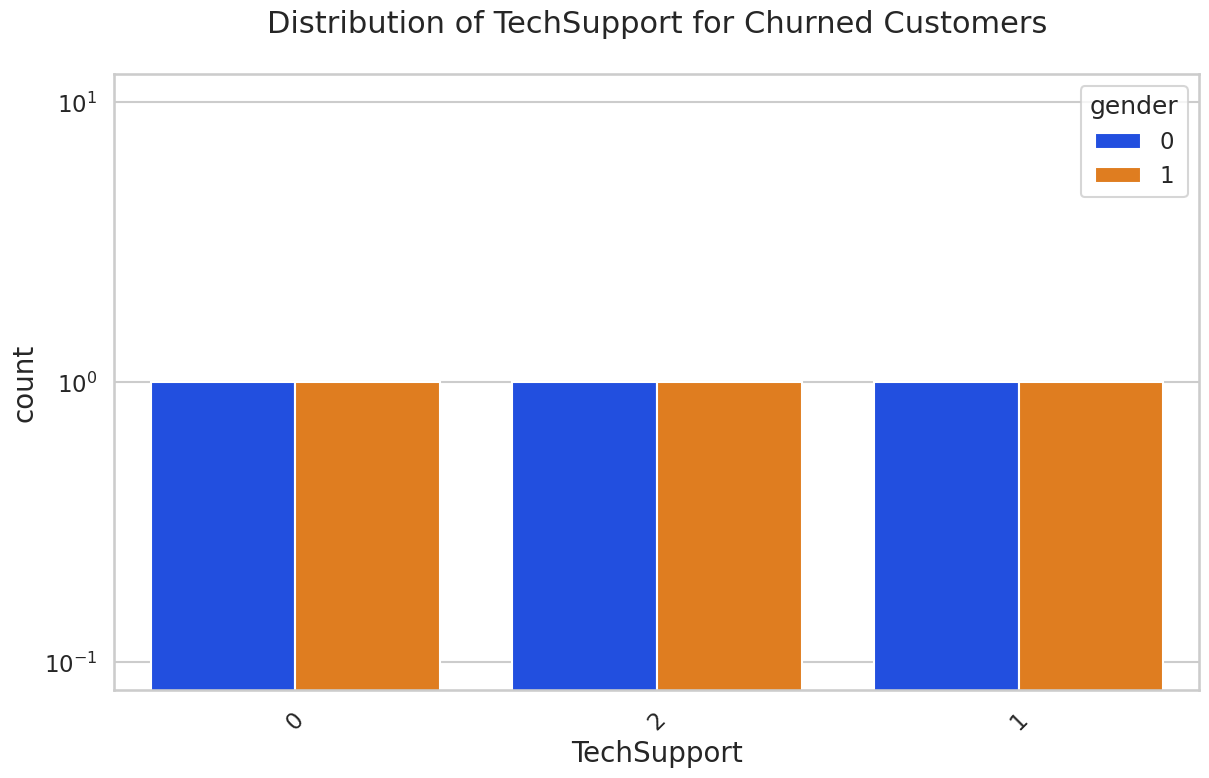

In [50]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

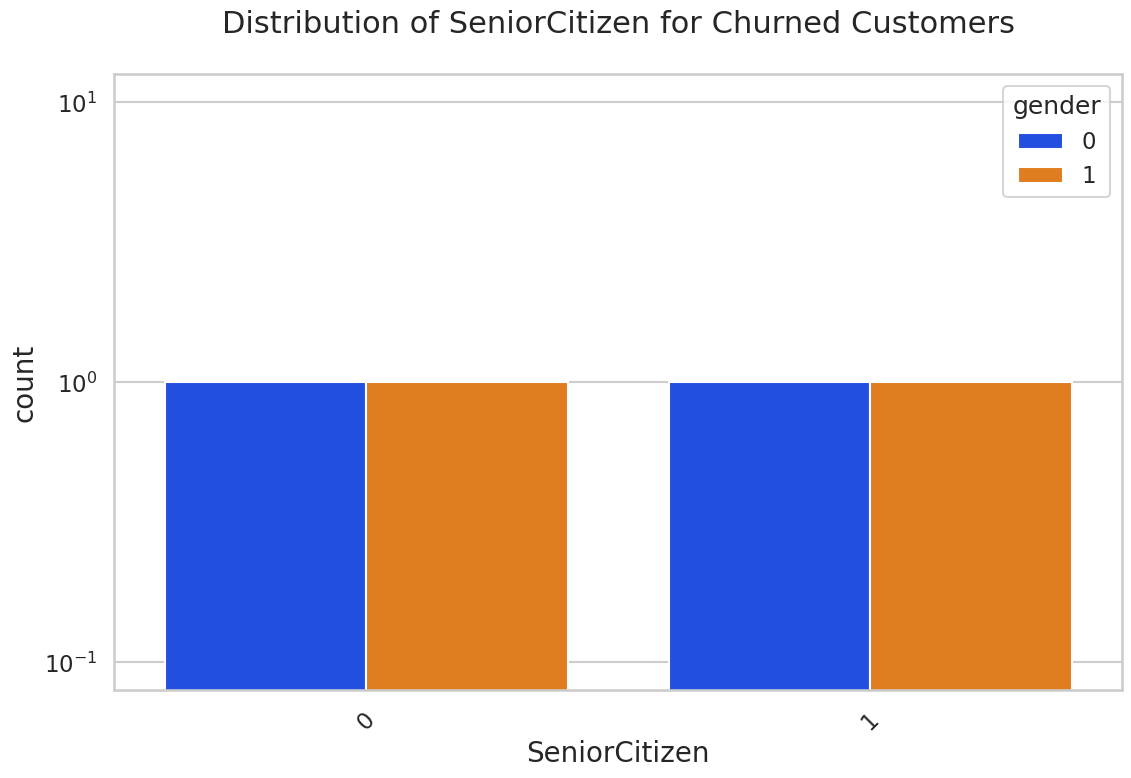

In [51]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')


## 3. Model Building

In [53]:
X=df_copy.drop('Churn',axis=1)
y=df_copy['Churn']

In [54]:
X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,2
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,6
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,0


In [55]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [56]:
df_copy['Churn'].value_counts()/len(df_copy) #data is highly imbalancing

,count
Churn,
0,0.734215
1,0.265785


In [57]:
from sklearn.model_selection  import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
print('Traing data shape')

print(X_train.shape)
print(y_train.shape)

print('Testing Data shape')

print(X_test.shape)
print(y_test.shape)

Traing data shape
(5625, 19)
(5625,)
Testing Data shape
(1407, 19)
(1407,)


In [60]:
print(y_test.value_counts())

print(y_train.value_counts())

Churn
0    1033
1     374
Name: count, dtype: int64
Churn
0    4130
1    1495
Name: count, dtype: int64


In [61]:
from sklearn.tree import DecisionTreeClassifier

model_dtc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [62]:
model_dtc.fit(X_train,y_train)
model_dtc.score(X_test,y_test)

0.7619047619047619

In [63]:
y_pred=model_dtc.predict(X_test)
y_pred[:10]

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [64]:
print(y_test[:10])

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1033
           1       0.55      0.56      0.56       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



''' As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)'''


'''main advantage of using SMOTEENN is that it addresses both overfitting and underfitting issues that can arise from class imbalance. By generating synthetic samples and removing noisy ones'''

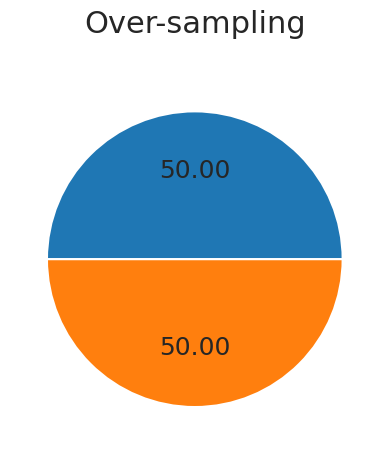

In [66]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()

X_ovs,y_ovs=smote.fit_resample(X,y)



fig, oversp = plt.subplots()
oversp.pie( y_ovs.value_counts(), autopct='%.2f')
oversp.set_title("Over-sampling")
plt.show()


In [67]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_ovs, y_ovs,test_size=0.2,random_state=42)

In [68]:
from sklearn.linear_model  import LogisticRegression

model_lr=LogisticRegression(max_iter=1000)

model_lr.fit(Xr_train,yr_train)

y_pred=model_lr.predict(Xr_test)
y_pred[:10]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [69]:
model_lr.score(Xr_test,yr_test)

0.8015488867376573

In [70]:
from sklearn.metrics import accuracy_score, classification_report


report = classification_report(y_pred, yr_test, labels=[0, 1])

print(report)

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       973
           1       0.83      0.78      0.81      1093

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yr_test,y_pred)

array([[800, 237],
       [173, 856]])

In [72]:
from sklearn.tree import DecisionTreeClassifier

model_dtc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

model_dtc.fit(Xr_train,yr_train)

y_pred=model_dtc.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [73]:
yr_test[:10]

,Churn
4139,1
1692,0
2692,0
7704,1
321,0
9752,1
39,1
3813,0
7396,1
2613,0


In [74]:
model_dtc.score(Xr_test,yr_test)

0.8068731848983544

In [75]:
print(classification_report(yr_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1037
           1       0.78      0.85      0.81      1029

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



In [76]:
confusion_matrix(yr_test,y_pred)

array([[797, 240],
       [159, 870]])

In [77]:
from sklearn.ensemble import RandomForestClassifier

model_rfc=RandomForestClassifier(n_estimators=100, random_state = 100,max_depth=6, min_samples_leaf=8,class_weight='balanced')

model_rfc.fit(Xr_train,yr_train)

y_pred=model_rfc.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [78]:
model_rfc.score(Xr_test,yr_test)

0.813649564375605

In [79]:
report_rfc=classification_report(y_pred,yr_test)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       948
           1       0.86      0.79      0.82      1118

    accuracy                           0.81      2066
   macro avg       0.81      0.82      0.81      2066
weighted avg       0.82      0.81      0.81      2066



In [80]:
confusion_matrix(yr_test,y_pred)

array([[800, 237],
       [148, 881]])

In [81]:
from sklearn.ensemble import  AdaBoostClassifier

model_abc=AdaBoostClassifier(n_estimators=100, random_state = 100)

model_abc.fit(Xr_train,yr_train)

y_pred=model_abc.predict(Xr_test)

In [82]:
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       944
           1       0.87      0.80      0.83      1122

    accuracy                           0.82      2066
   macro avg       0.82      0.83      0.82      2066
weighted avg       0.83      0.82      0.82      2066



In [83]:
confusion_matrix(yr_test,y_pred)

array([[808, 229],
       [136, 893]])

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc=GradientBoostingClassifier()
model_gbc

GradientBoostingClassifier()

In [85]:
model_gbc.fit(Xr_train,yr_train)

GradientBoostingClassifier()

In [86]:
y_pred_gbc=model_gbc.predict(Xr_test)
y_pred_gbc[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [87]:
yr_test[:10]

,Churn
4139,1
1692,0
2692,0
7704,1
321,0
9752,1
39,1
3813,0
7396,1
2613,0


In [88]:
print(classification_report(y_pred_gbc,yr_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       962
           1       0.86      0.80      0.83      1104

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [89]:
confusion_matrix(yr_test,y_pred)

array([[808, 229],
       [136, 893]])

In [90]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier(class_weight={0:1, 1:2})

model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1, 1: 2}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [91]:
model_xgb.fit(Xr_train,yr_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:02:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1, 1: 2}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [92]:
y_pred=model_xgb.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [93]:
yr_test[:10]

,Churn
4139,1
1692,0
2692,0
7704,1
321,0
9752,1
39,1
3813,0
7396,1
2613,0


In [94]:
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1005
           1       0.85      0.82      0.84      1061

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yr_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[850 187]
 [155 874]]


In [96]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import time

# Define your GradientBoostingClassifier and param_dist
model = GradientBoostingClassifier()
param_dist = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Create RandomizedSearchCV object with fewer iterations
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=10, scoring='accuracy', random_state=42)

# Start the timer
start_time = time.time()

# Fit the RandomizedSearchCV object
random_search.fit(Xr_train, yr_train)

end_time = time.time()

total_time = end_time - start_time

print("RandomizedSearchCV took {:.2f} seconds to complete.".format(total_time))

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


RandomizedSearchCV took 106.52 seconds to complete.
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 7, 'learning_rate': 0.1}


## Final Model

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

best_params = {
   'n_estimators': 100, 'min_samples_split':5 , 'max_depth': 7, 'learning_rate': 0.1

}

# Create Gradient Boosting Classifier with the best hyperparameters
final_gb_classifier = GradientBoostingClassifier(**best_params)

final_gb_classifier.fit(Xr_train, yr_train)

GradientBoostingClassifier(max_depth=7, min_samples_split=5)

In [98]:
from sklearn.model_selection import cross_val_score

# trained model with tuned hyperparameters
cv_scores = cross_val_score(final_gb_classifier, Xr_train, yr_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.83535109 0.87288136 0.82808717 0.85230024 0.85108959 0.84140436
 0.83898305 0.83292978 0.8220339  0.86077482]
Mean CV score: 0.8435835351089589


In [99]:
y_pred=final_gb_classifier.predict(Xr_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [100]:
yr_test[:10]

,Churn
4139,1
1692,0
2692,0
7704,1
321,0
9752,1
39,1
3813,0
7396,1
2613,0


In [101]:
print(classification_report(y_pred,yr_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1012
           1       0.85      0.83      0.84      1054

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [102]:
confusion_matrix(y_pred,yr_test)

array([[860, 152],
       [177, 877]])

In [105]:
import os
import pickle
from sklearn.ensemble import GradientBoostingClassifier


# Define and train Gradient Boosting Classifier
best_params = {
    'n_estimators': 100,
    'min_samples_split': 5,
    'max_depth': 7,
    'learning_rate': 0.1
}

final_gb_classifier = GradientBoostingClassifier(**best_params)

# Train the final model on the entire training data (assuming Xr_train and yr_train are defined)
final_gb_classifier.fit(X_train, y_train)

# Dumping the model to a file
with open('final_gb_classifier.pkl', 'wb') as file:
    pickle.dump(final_gb_classifier, file)

# Load the saved model
with open('final_gb_classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [106]:
# Prepare your own data for testing
# Create a DataFrame with your feature data
your_features = pd.DataFrame({
    'gender': [1, 0, 0, 0, 0],
    'SeniorCitizen': [0, 0, 0, 0, 0],
    'Partner': [0, 0, 0, 1, 1],
    'Dependents': [0, 0, 0, 0, 1],
    'PhoneService': [1, 0, 1, 1, 1],
    'MultipleLines': [0, 0, 0, 2, 2],
    'InternetService': [1, 0, 1, 1, 0],
    'OnlineSecurity': [0, 0, 0, 2, 2],
    'OnlineBackup': [0, 0, 1, 2, 2],
    'DeviceProtection': [0, 0, 0, 0, 2],
    'TechSupport': [0, 0, 0, 2, 2],
    'StreamingTV': [0, 1, 0, 0, 0],
    'StreamingMovies': [0, 1, 0, 0, 0],
    'Contract': [2, 0, 0, 1, 2],
    'PaperlessBilling': [0, 1, 0, 0, 0],
    'PaymentMethod': [1, 1, 1, 0, 0],
    'MonthlyCharges': [90.407734, 58.273891, 74.379767, 108.55, 64.35],
    'TotalCharges': [707.535237, 3264.466697, 1146.937795, 5610.7, 1558.65],
    'tenure_group': [0, 4, 1, 4, 2]
})

# Make predictions using the loaded model on your own data
predictions = loaded_model.predict(your_features)

# Print the predictions
print("Predictions:", predictions)

Predictions: [0 0 0 1 0]
